# 🎬 Analyse des Biais de Notation – Cas Fandango

## Étude exploratoire des écarts entre notes affichées et notes réelles

**Auteur :** Abdoulaziz Keita  
**Langage :** Python  
**Objectif :** Détecter d’éventuels biais dans les notes affichées par Fandango.

## 📌 Contexte

Ce projet s’inspire d’une enquête du site FiveThirtyEight.

Fandango, plateforme de vente de billets de cinéma, affiche des notes de films.
Étant donné son intérêt commercial, il est légitime de se demander si les notes sont totalement objectives.

## 🎯 Problématique

Peut-on observer un biais dans les notes affichées par Fandango comparativement aux autres plateformes ?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 📂 Chargement des données

Importation des datasets contenant les notes Fandango et celles d'autres plateformes (IMDB, Rotten Tomatoes, Metacritic).

In [3]:
url = pd.read_csv('C:/Users/abdou/OneDrive/Bureau/Python avec Oscar Akantsi/Projet/fandango_scrape.csv')

In [4]:
fandango = pd.DataFrame(url)

In [5]:
fandango.info()

<class 'pandas.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    str    
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), str(1)
memory usage: 15.9 KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [7]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


## 🔍 Analyse 1 : Comparaison entre notes réelles et notes affichées

Comparaison entre :
- RATING (note calculée)
- STARS (note affichée)

Objectif : détecter un décalage systématique.

<Axes: xlabel='STARS', ylabel='VOTES'>

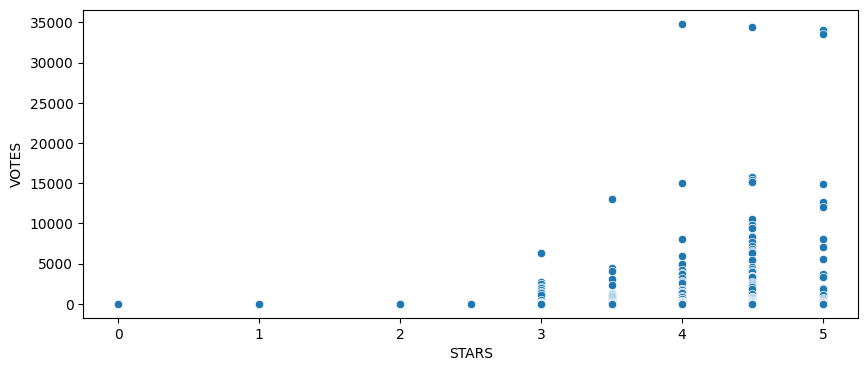

In [10]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='STARS',y='VOTES',data=(fandango))


In [9]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [21]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [31]:
fandango['YEAR'] = fandango['FILM'].apply(lambda x: x.split('(')[-1].replace(')',''))

In [33]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


<function matplotlib.pyplot.show(close=None, block=None)>

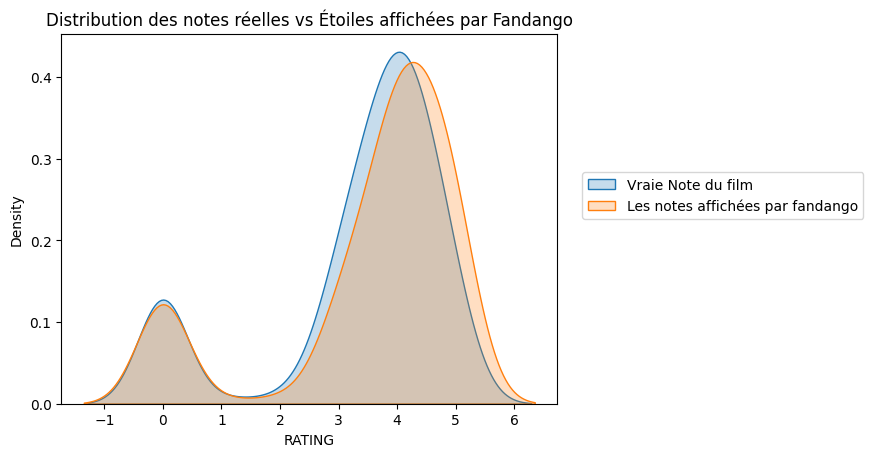

In [18]:
plt.Figure(figsize=(10,4))
sns.kdeplot(x='RATING', data=(fandango), label = 'Vraie Note du film',fill=True )
sns.kdeplot(x='STARS', data=(fandango), label = 'Les notes affichées par fandango', fill=True)
plt.legend(loc=(1.05,0.5))
plt.title("Distribution des notes réelles vs Étoiles affichées par Fandango")
plt.show

## 🌍 Analyse 2 : Comparaison avec d'autres plateformes

Comparaison des distributions de notes entre :
- Fandango
- Rotten Tomatoes
- IMDB
- Metacritic

Les notes sont normalisées sur une échelle 0–5.

In [19]:
url_2 = pd.read_csv('C:/Users/abdou/OneDrive/Bureau/Python avec Oscar Akantsi/Projet/all_sites_scores.csv')

In [20]:
all_site = pd.DataFrame(url_2)

In [23]:
all_site.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [26]:
all_site.info()

<class 'pandas.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    str    
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), str(1)
memory usage: 9.3 KB


<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

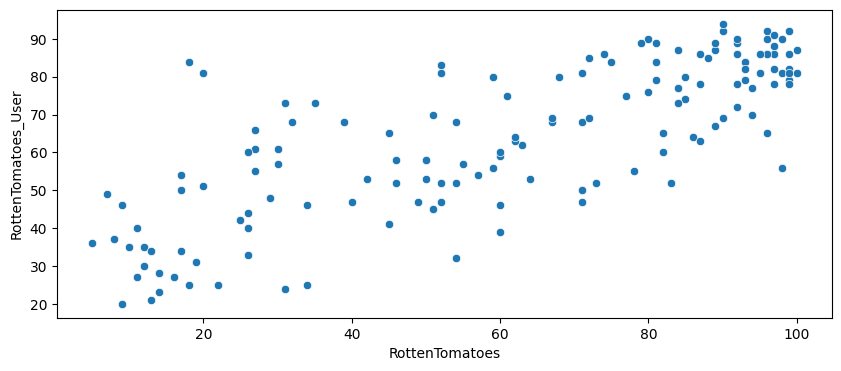

In [33]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='RottenTomatoes',y='RottenTomatoes_User', data=(all_site))

In [28]:
all_site['Rotten_Diff'] = all_site['RottenTomatoes'] - all_site['RottenTomatoes_User']

In [37]:
all_site.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [40]:
all_site['Rotten_Diff'].mean()

np.float64(-3.0273972602739727)

In [43]:
# Top 5 des films adorés par les critiques mais détestés par le public
all_site.nsmallest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


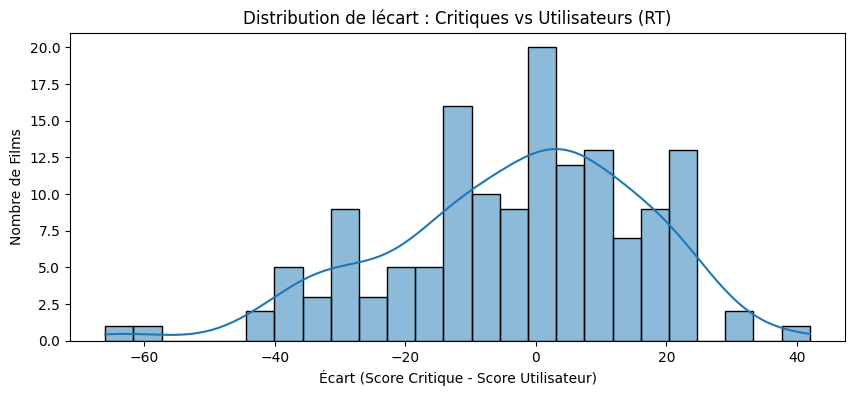

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(data=(all_site),x='Rotten_Diff', kde=True, bins=25)
plt.title('Distribution de l''écart : Critiques vs Utilisateurs (RT)')
plt.xlabel('Écart (Score Critique - Score Utilisateur)')
plt.ylabel('Nombre de Films')
plt.show()

In [45]:
fusion = pd.merge(fandango,all_site, on= 'FILM', how='inner')


In [46]:
fusion.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,8


In [47]:
fusion.info()

<class 'pandas.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    str    
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   RottenTomatoes              145 non-null    int64  
 5   RottenTomatoes_User         145 non-null    int64  
 6   Metacritic                  145 non-null    int64  
 7   Metacritic_User             145 non-null    float64
 8   IMDB                        145 non-null    float64
 9   Metacritic_user_vote_count  145 non-null    int64  
 10  IMDB_user_vote_count        145 non-null    int64  
 11  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), str(1)
memory usage: 13.7 KB


In [50]:
fusion['RT_NORM'] = all_site['RottenTomatoes']/20
fusion['RT_u_NORM'] = all_site['RottenTomatoes_User']/20
fusion['Meta_Norm'] = all_site['Metacritic']/20
fusion['Meta_u_Norm'] = all_site['Metacritic_User']/2
fusion['IMDB_Norm'] = all_site['IMDB']/2

In [54]:
fusion

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_NORM,RT_u_NORM,Meta_Norm,Meta_u_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,-17,3.70,4.30,3.30,3.55,3.90
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,-10,4.25,4.00,3.35,3.75,3.55
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,-13,4.00,4.50,3.20,4.05,3.90
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,-3,0.90,4.20,1.10,2.35,2.70
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,8,0.70,1.40,1.45,1.70,2.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,87,63,68,6.4,6.7,19,5289,24,4.90,4.50,4.70,4.45,4.30
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,95,81,87,6.3,7.0,18,1107,14,4.35,3.90,3.35,3.95,3.70
142,The Wrecking Crew (2015),4.5,4.2,38,93,84,67,7.0,7.8,4,732,9,4.85,4.10,4.15,3.75,3.60
143,Tangerine (2015),4.0,3.9,36,95,86,86,7.3,7.4,14,696,9,4.85,3.90,4.45,4.40,3.70


In [56]:
Norme_Score = fusion[['FILM','STARS','RATING','RT_NORM','RT_u_NORM','Meta_Norm','Meta_u_Norm','IMDB_Norm']]

In [57]:
Norme_Score.head()

,FILM,STARS,RATING,RT_NORM,RT_u_NORM,Meta_Norm,Meta_u_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,3.70,4.3,3.30,3.55,3.90
1,Jurassic World (2015),4.5,4.5,4.25,4.0,3.35,3.75,3.55
2,American Sniper (2015),5.0,4.8,4.00,4.5,3.20,4.05,3.90
3,Furious 7 (2015),5.0,4.8,0.90,4.2,1.10,2.35,2.70
4,Inside Out (2015),4.5,4.5,0.70,1.4,1.45,1.70,2.55


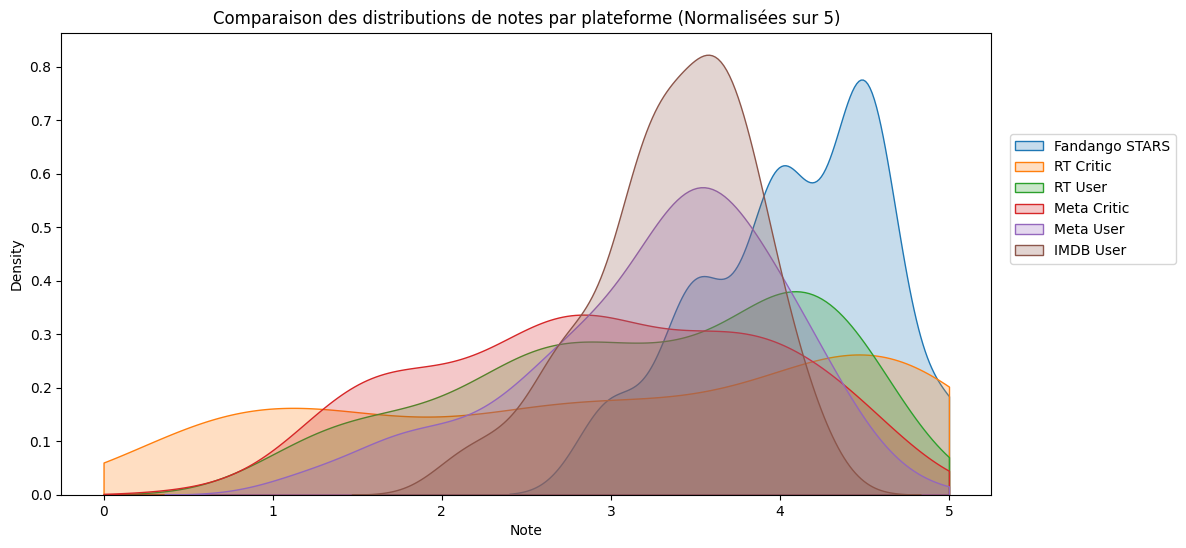

In [62]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=(Norme_Score),x = 'STARS', clip=(0,5), fill=True, label = 'Fandango STARS')
sns.kdeplot(data=(Norme_Score),x ='RT_NORM', clip=(0,5),fill=True,label='RT Critic' )
sns.kdeplot(data=(Norme_Score),x ='RT_u_NORM', clip=(0,5),fill=True,label='RT User' )
sns.kdeplot(data=(Norme_Score),x ='Meta_Norm', clip=(0,5),fill=True,label='Meta Critic' )
sns.kdeplot(data=(Norme_Score),x ='Meta_u_Norm', clip=(0,5),fill=True,label='Meta User' )
sns.kdeplot(data=(Norme_Score),x ='IMDB_Norm', clip=(0,5),fill=True,label='IMDB User' )
plt.title('Comparaison des distributions de notes par plateforme (Normalisées sur 5)')
plt.xlabel('Note')
plt.legend(loc=(1.02,0.5))
plt.show()

## ⚠️ Analyse des films les plus mal notés

Isolation des films les plus sévèrement notés par les critiques afin d'observer leur traitement sur Fandango.


In [65]:
Pire_Film = Norme_Score.nsmallest(10,'RT_NORM')[['FILM','STARS','RT_NORM']]

In [66]:
Pire_Film

,FILM,STARS,RT_NORM
133,Serena (2015),3.0,0.25
105,What We Do in the Shadows (2015),4.5,0.35
53,The Gift (2015),4.0,0.40
15,Spy (2015),4.5,0.45
48,Top Five (2014),4.0,0.45
33,Focus (2015),4.0,0.50
35,The SpongeBob Movie: Sponge Out of Water (2015),3.5,0.55
60,Dope (2015),4.5,0.55
58,Aloha (2015),3.5,0.60
59,The DUFF (2015),4.5,0.60


## 📈 Conclusion

L’analyse met en évidence une tendance à l’inflation des notes affichées par Fandango.

Cette étude montre comment :
- L’intérêt commercial peut influencer la présentation des données.
- L’analyse exploratoire permet de détecter des anomalies statistiques.

Ce projet démontre mes compétences en :
- Nettoyage de données
- Analyse comparative
- Visualisation
- Interprétation business